In [1]:
! pip install spotipy

Defaulting to user installation because normal site-packages is not writeable


Step 3: Environment variables & Step 4: Initialize Spotipy library

In [6]:
import os
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

load_dotenv()

client_credentials_manager = SpotifyClientCredentials(
    client_id = os.environ.get("CLIENT_ID"),
    client_secret = os.environ.get("CLIENT_SECRET")
    )

sp = spotipy.Spotify(client_credentials_manager = client_credentials_manager)

Step 5: Make API requests

In [7]:

result = sp.artist_top_tracks('spotify:artist:3TOqt5oJwL9BE2NG9MEwDa')

if result:

    data_list = []
    for track in result['tracks'][:10]:
        print('track    : ' + track['name'])
        minutes = track['duration_ms'] // 60000
        seconds = track['duration_ms'] % 60000 // 1000
        print(f'audio    :  {minutes}:{seconds:02d}') 
        print('popularity: ' + str(track['popularity']))
        print()
        
        data_list.append({
            'Name' : track['name'],
            'Duration_ms' : (track['duration_ms']/(1000*60)%60),
            'Popularity' : track['popularity']
        })

track    : The Sound of Silence - CYRIL Remix
audio    :  3:05
popularity: 80

track    : Down with the Sickness
audio    :  4:39
popularity: 75

track    : The Sound of Silence
audio    :  4:08
popularity: 73

track    : Stricken
audio    :  4:05
popularity: 72

track    : Indestructible
audio    :  4:38
popularity: 66

track    : The Vengeful One
audio    :  4:12
popularity: 62

track    : Inside the Fire
audio    :  3:51
popularity: 63

track    : Decadence
audio    :  3:24
popularity: 63

track    : Ten Thousand Fists
audio    :  3:32
popularity: 60

track    : Land of Confusion
audio    :  4:47
popularity: 60



Step 6: Transform to Pandas DataFrame

In [8]:
import pandas as pd # This import throws an error I can't solve at the moment.
# To complete the exercise I've done it in app.py and executed it in an interactive window to show the scatter plot.

df = pd.DataFrame(data_list, columns = ["Name", "Duration_ms", "Popularity"])

df = df.sort_values("Popularity", ascending = False)
print(df.head(3))

                                 Name  Duration_ms  Popularity
0  The Sound of Silence - CYRIL Remix      3.08730          80
1              Down with the Sickness      4.65355          75
2                The Sound of Silence      4.14110          73


Step 7: Analyze statistical relationship

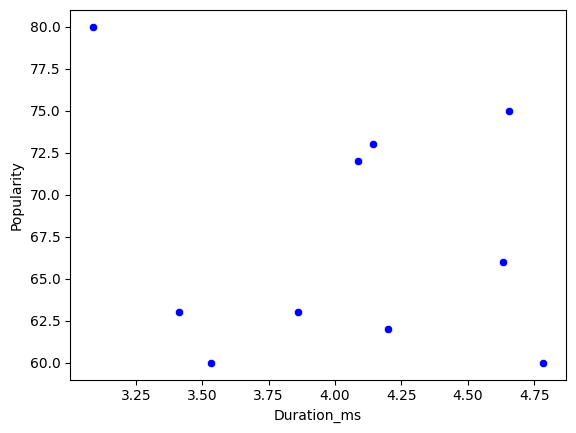

In [ ]:
import seaborn as sns

scatter_plot = sns.scatterplot(x = df['Duration_ms'], y = df['Popularity'], color = 'blue')



Conclusion: As shown in the scatter plot, there's no relation between the duration of the song and the popularity of it